Feature Engineering&Feature Selection

Цель: Повторить вычисления из лекции на данном датасете: https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge

Задача данного ДЗ - опробовать методы преобразования признаков на датасете: https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge

Ваша цель получить как можно более высокие метрики сконцентрировавшись на преобразовании признаков.

Опробуйте различные техники - замены НаНов, замена аномалий, работа с категориальными переменными.

Попробуйте техники, используемые для несбалансированных датасетов.

В качестве прогнозирующих алгоритмов можете использовать любой, но в рамках курса на текущий момент разумнее использовать логистическую регрессию и kNN.

Критерии оценки: Оценка включает следующие критерии:

1) Понятное описание: какие техники и алгоритмы были опробованы - было бы неплохо в самом начале тезисно выписать опробованные методики и их результат (помогло / не помогло).

2) Наличие визуализаций (не обязательно строить много графиков - можно пару репрезентативных)

3) Наличие хотя бы одной модификации данных, приводящей к улучшению результатов.

### О датасете: 

Файлы содержат информацию об использовании грузовиков Scania и поломках APS (air pressure system), которая используется в данных траках как для смены передач, так и для торможения. Задача состоит в том, чтобы научиться определять поломку по списку имеющихся в арсенале переменных (всего 171 анонимизированная колонка с учетом целевой переменной).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#библиотека для визуализации пропусков
#import missingno as msno

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor

#import category_encoders as ce

#отображение всех переменных 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot')
%matplotlib inline

Пропуски в переменных заменены неким "na", с которым будет невозможно работать стандартными методами. Вычистим это значение во всем датасете во время загрузки. 

In [2]:
data = pd.read_csv('aps_failure_training_set.csv', na_values="na")
#datatest = pd.read_csv('aps_failure_test_set.csv', na_values="na")
data.shape
#datatest.shape

(60000, 171)

In [3]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [5]:
# Разделим датасет на численные и категориальные переменные
numeric_types = ['int64','float64']
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
object_vars = list(data.select_dtypes(include=["object"]).columns)

In [6]:
data_num = data[numerical_vars].copy()
data_obj = data[object_vars].copy()

In [7]:
data_num.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,NaN,NaN,NaN,Na

In [8]:
data_num.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,59329.000000,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.935500e+04,57275.000000,57273.000000,57497.000000,57500.000000,5.935800e+04,5.935800e+04,5.941100e+04,5.941100e+04,3.696600e+04,3.272300e+04,2.045100e+04,1.599100e+04,1.366700e+04,1.226000e+04,1.127800e+04,1.073600e+04,5.927400e+04,5.983300e+04,5.930900e+04,5.930900e+04,5.674300e+04,5.952700e+04,5.727700e+04,55644.000000,5.927400e+04,5.674500e+04,59324.0,5.749800e+04,4.513900e+04,45139.000000,45139.000000,5.966200e+04,5.966200e+04,5.966200e+04,50447.000000,50123.000000,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,4.513900e+04,57276.000000,5.930900e+04,13671.000000,59331.000000,59331.000000,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,46192.000000,46192.000000,4.619200e+04,4.619200e+04,46192.000000,4.619200e+04,46192.000000,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,1.078551e+06,1.546032e+06,1.051123e+06,1.162622e+03,7.849608e+03,4.420992e+03,8.066082e+03,8.724082e+04,1.476897e+06,2.1

In [9]:
data_obj.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


В датасете имеется очень большое количество пропущенных значений. В двух колонках пропуски превосходят 80% от общего объема данных

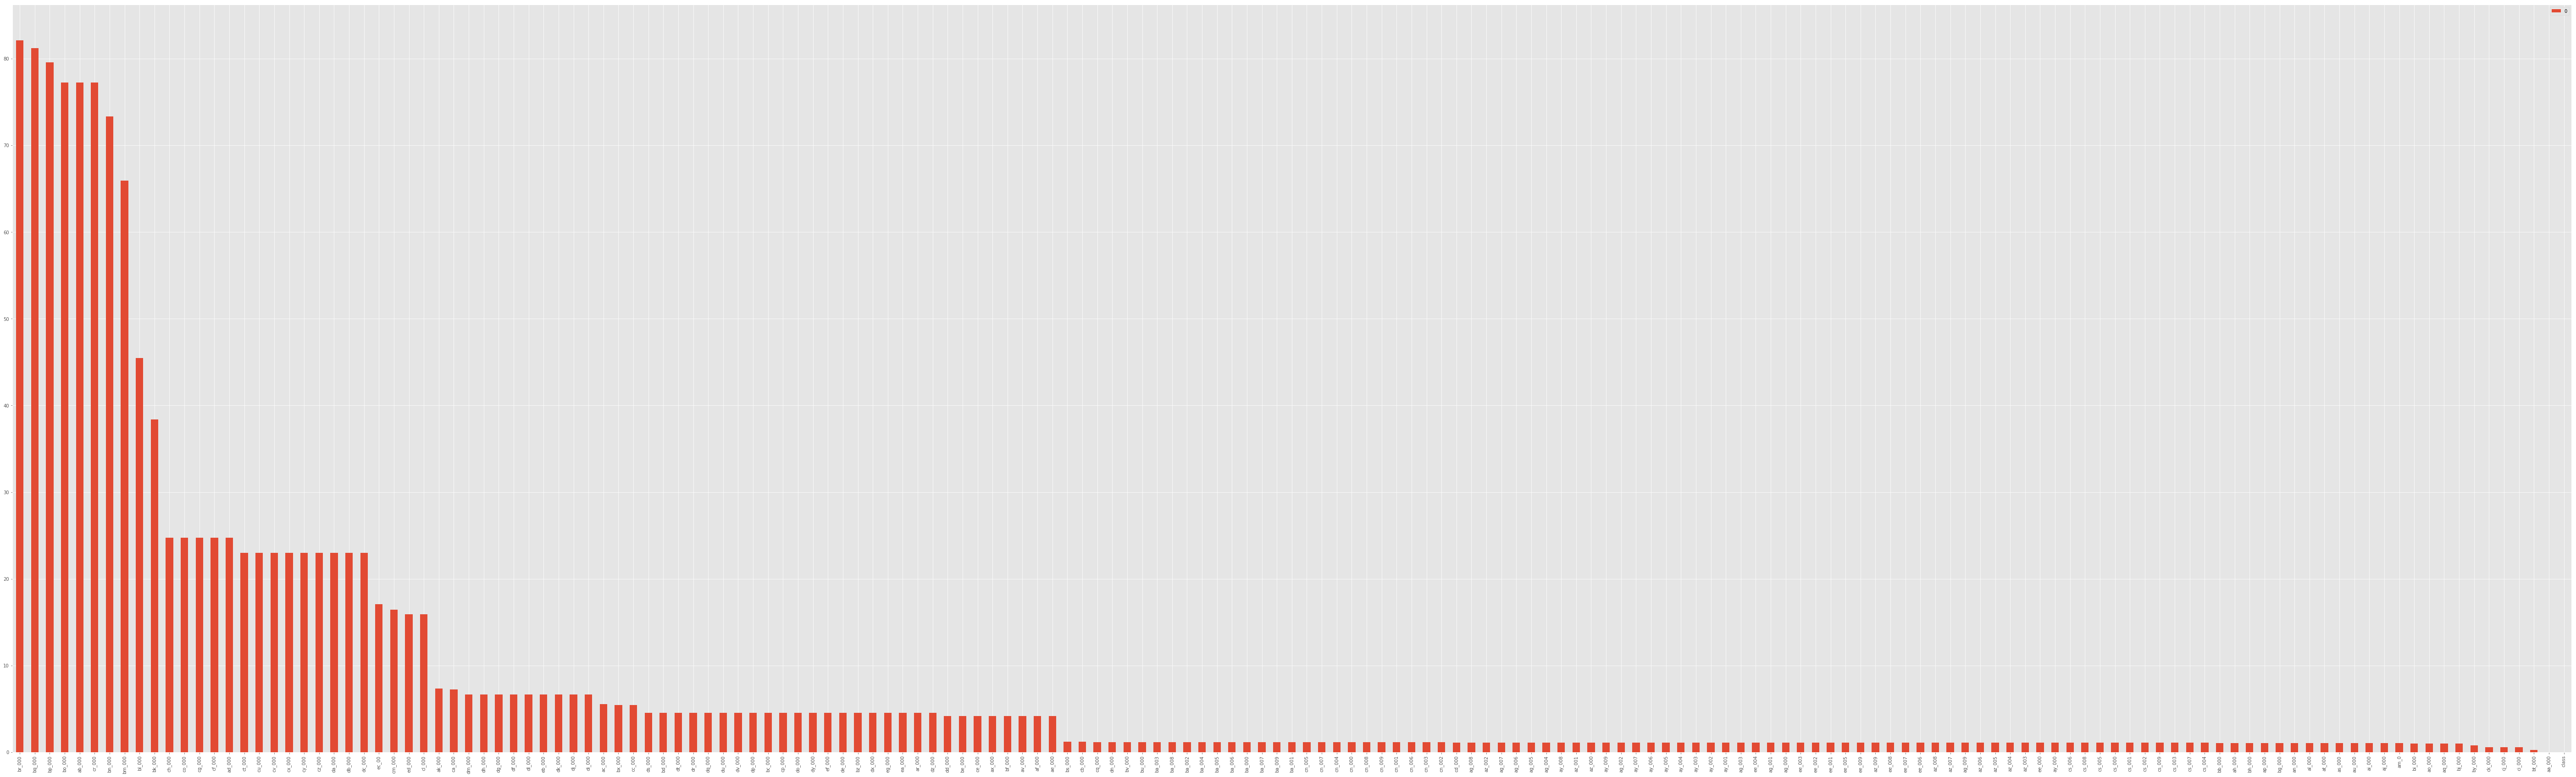

In [10]:
missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing.plot.bar(figsize=(100,30))

In [11]:
missing[missing[0]>30]

,0
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000
cr_000,77.215000
bn_000,73.348333
bm_000,65.915000
bl_000,45.461667
bk_000,38.390000


Видна сильная несоразмерность классов. Поломки APS у грузовиков Scania случились в 1000 случаев из 60 тысяч, представленных в датасете. При этом поломка представлена как 'pos', а исправность как 'neg'. 

Сделаем one-hot encoding целевой переменной и для примера посмотрим как некоторые из признаков связаны с целевой переменной.

In [12]:
data.groupby('class')['class'].count()

class
neg    59000
pos     1000
Name: class, dtype: int64

In [13]:
data['class'] = np.where(data['class']=='neg', 0, 1)

In [14]:
data.groupby('class')['class'].count()

class
0    59000
1     1000
Name: class, dtype: int64

In [15]:
print(data_num.columns)

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'], dtype='object', length=170)


D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


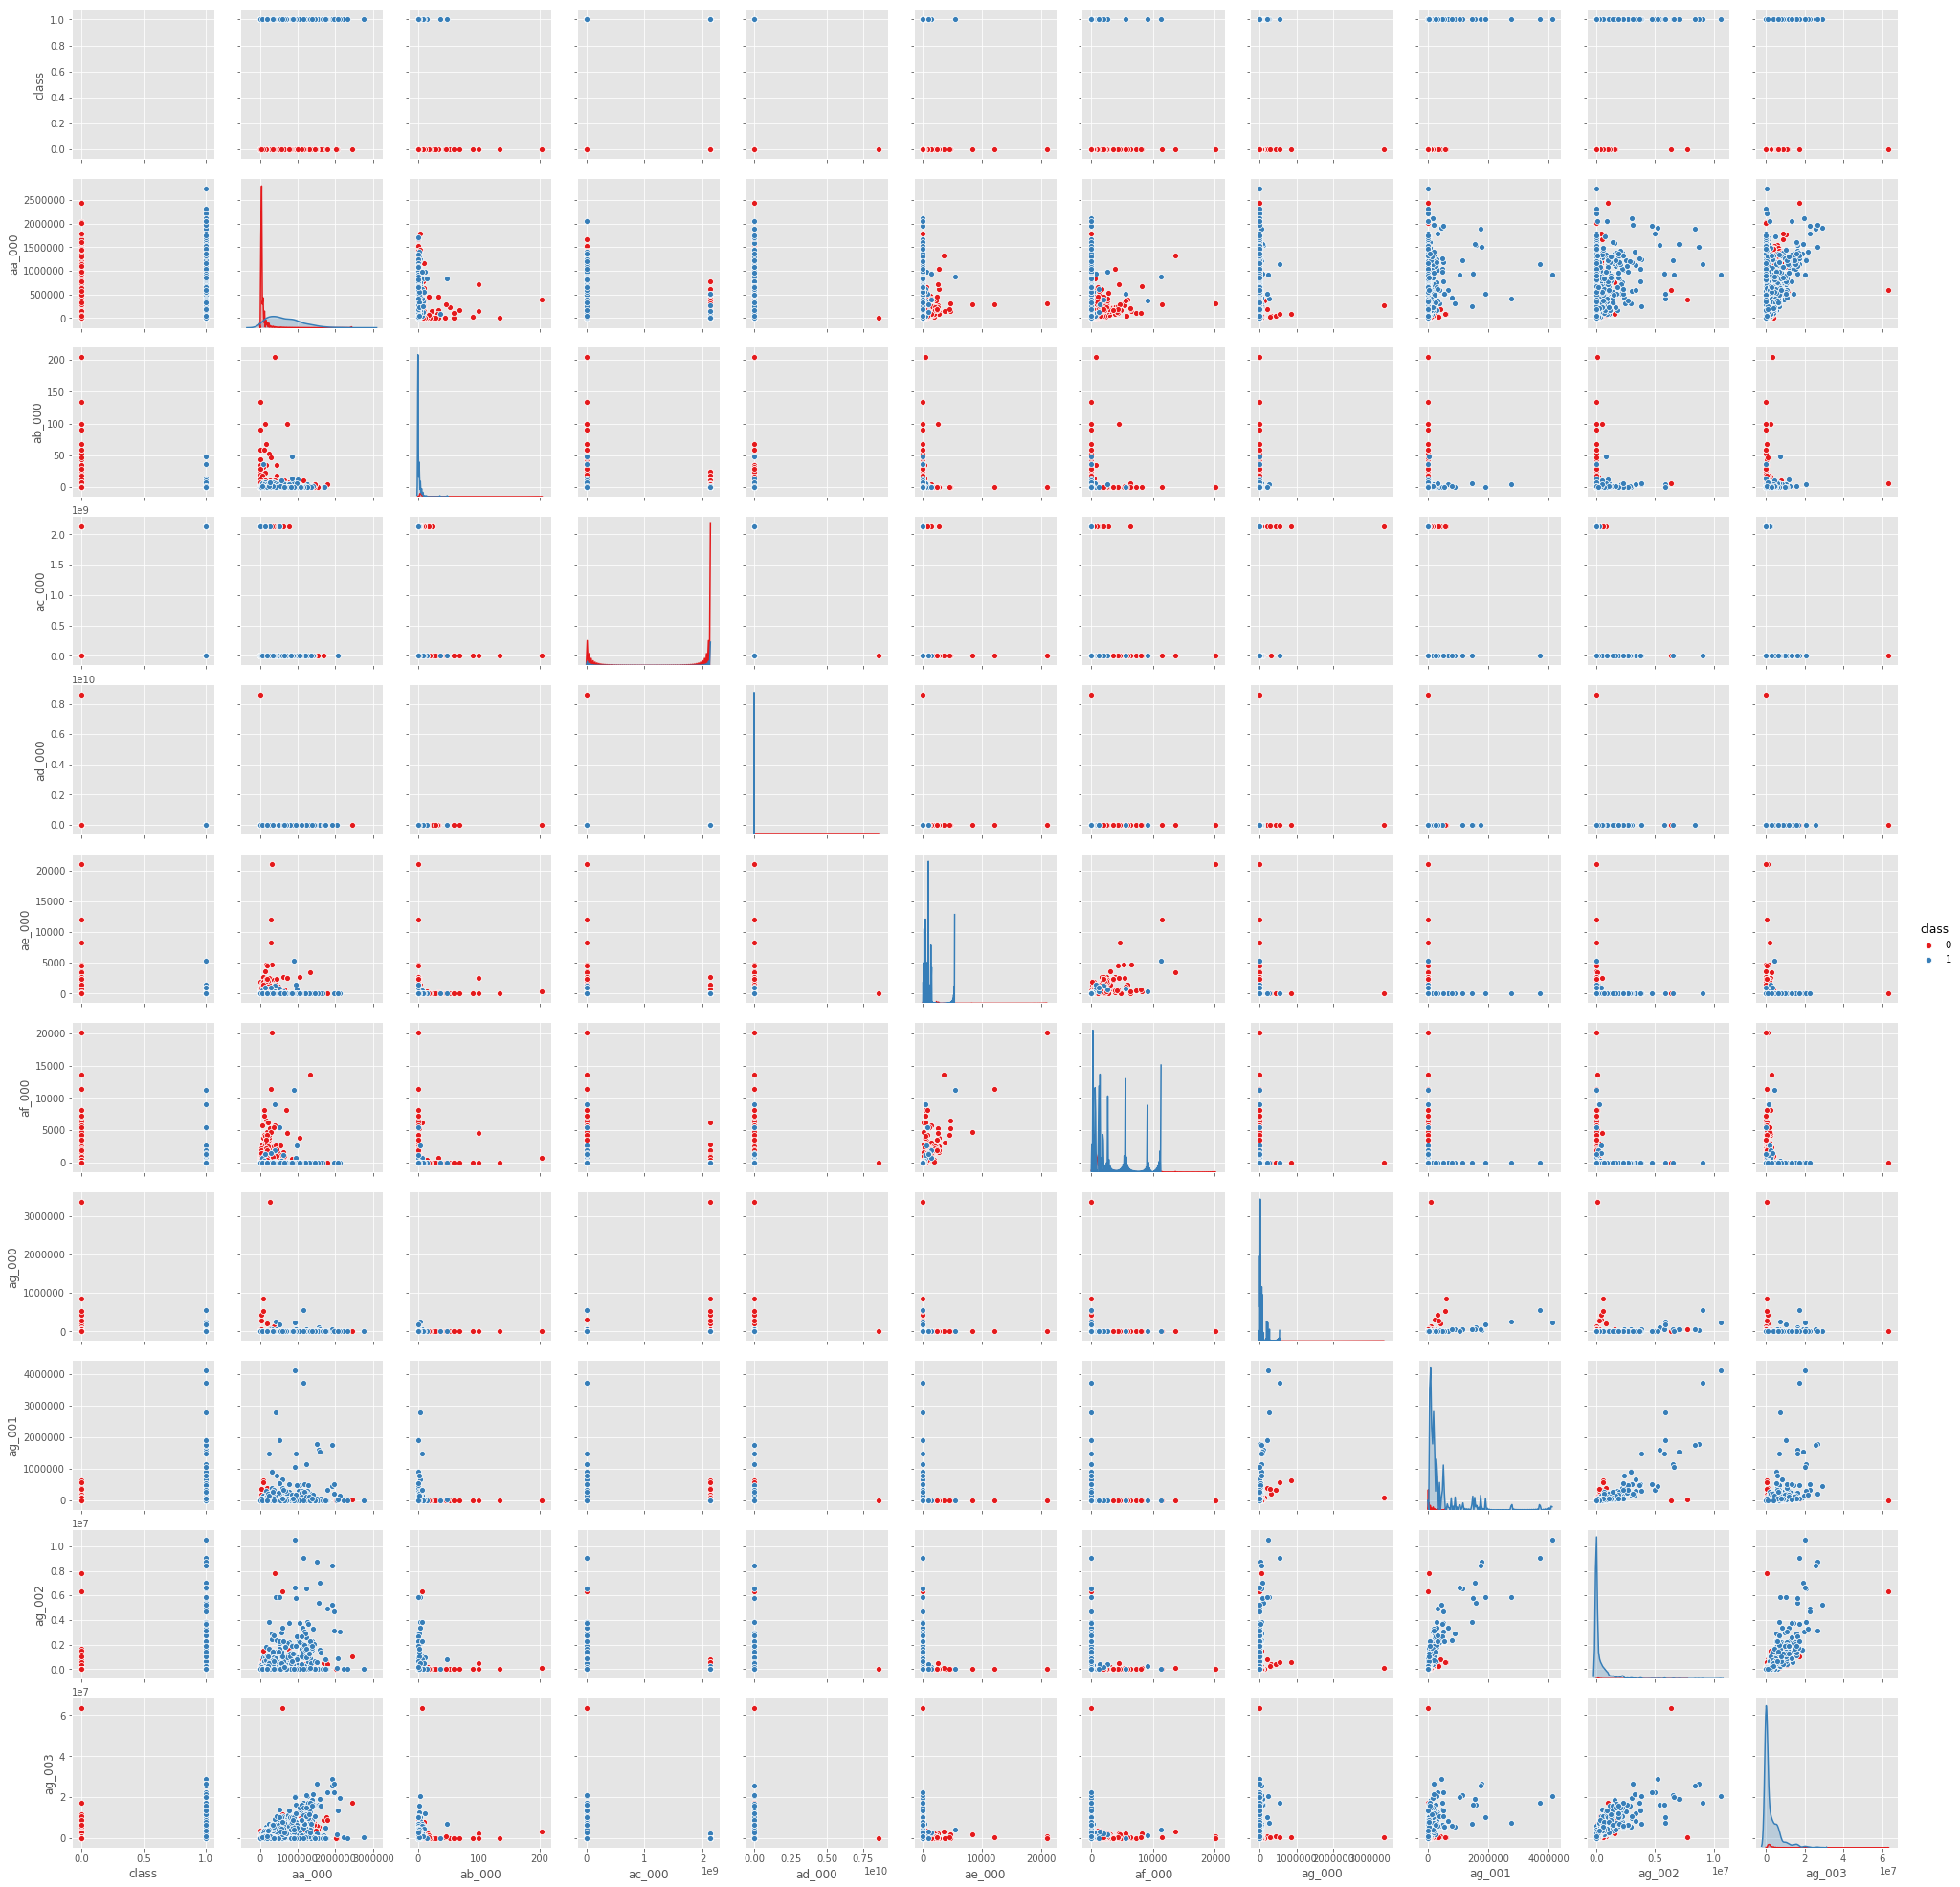

In [16]:
sns.pairplot(data=data[['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003']],
             hue='class',
             palette='Set1')
plt.show()

## Baseline

Делаем базовую модель, в которой не будет применяться специальная обработка переменных ни для выбросов, ни для пропусков.
Используем обычную логистическую регрессию без подбора параметров. Данные перед обучением стандартизируем, а пропуски просто удалим.

In [17]:
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['class'], axis=1),data['class'], test_size=test_size,
    stratify=data['class'],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [18]:
# Удалим колонки, в которых количество пропусков более 70% от общего числа данных
data_num_wo_nan= data.drop(['br_000','bq_000', 'bp_000','bo_000', 'ab_000','cr_000', 'bn_000', 'bm_000', 'bk_000', 'bl_000'], axis = 1)

In [19]:
#Удалим все оставшиеся строки с пропусками 
#data_num_wo_nan = data_num_wo_nan.dropna()
data_num_wo_nan = data_num_wo_nan.dropna()

In [20]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_wo_nan)

Train_shape: (29162, 160) Test shape: (12499, 160)


In [21]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

D:\programs\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\programs\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
D:\programs\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [22]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [23]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

quality_list_baseline = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.997
Precision: 	 0.544
Recall: 	 0.689
f1_score: 	 0.608
ROC-AUC: 	 0.843



In [24]:
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843


Итак, Baseline модель выдала точность в 0.98, и F1-score = 0.709, что само по себе уже является достаточно неплохоми метриками качества. Но стоит отметить, что данная модель умеет делать предсказания только для тех данных, где имеются данные по всем имеющимся 170 переменнным.
Наша задача - улучшить базовую модель с помощью feature engineering

## Feature Engineering
Итак, пробуем улучшить модель.

Во-первых, разберемся с корреляцией по уже отработанной схеме. Функция ниже удаляет в цикле одну из двух переменных, корреляция между которыми составляет более 0.8. При этом удаляется именно та переменная из двух, у которой корреляция с другими переменными в датасете будет выше.

In [25]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data.drop(['class'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [26]:
data_corr_features = corr_feature_detect(data, threshold=0.8)
print(data_corr_features)

['bb_000', 'ah_000', 'bv_000', 'bt_000', 'bu_000', 'cf_000', 'co_000', 'cc_000', 'am_0', 'an_000', 'br_000', 'cq_000', 'bp_000', 'bh_000', 'bg_000', 'ds_000', 'aq_000', 'bo_000', 'ba_004', 'ci_000', 'ba_003', 'ed_000', 'cn_005', 'ee_003', 'dc_000', 'ap_000', 'do_000', 'bx_000', 'ba_002', 'bm_000', 'cs_005', 'bn_000', 'ak_000', 'cn_004', 'bj_000', 'aa_000', 'by_000', 'ee_000', 'ba_001', 'ba_000', 'ba_005', 'cn_002', 'cn_001', 'dl_000', 'cn_003', 'ee_002', 'ag_005', 'ag_004', 'ay_002', 'ag_006', 'ca_000', 'af_000', 'ao_000', 'ag_007', 'cz_000', 'bl_000', 'cv_000', 'du_000']


Итого мы исключили 58 переменных.

In [27]:
len(data_corr_features)

58

In [28]:
data_corr_free = data.drop(data_corr_features, axis=1)

In [29]:
data.shape, data_corr_free.shape

((60000, 171), (60000, 113))

In [30]:
prct_missing = (data.isna().sum() / data.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more than 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

class      0.00
aa_000     0.00
ab_000    77.22
ac_000     5.56
ad_000    24.77
dtype: float64

Features with more than 40% NaNs: 9/171


In [31]:
prct_missing = (data_corr_free.isna().sum() / data_corr_free.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

class      0.00
ab_000    77.22
ac_000     5.56
ad_000    24.77
ae_000     4.17
dtype: float64

Features with more then 40% NaNs: 3/113


### Типы пропусков: 
    - MCAR (Missing Completely At Random) — механизм формирования пропусков , при котором вероятность пропуска для каждой записи набора одинакова. Например, если проводился социологический опрос, в котором каждому десятому респонденту один случайно выбранный вопрос не задавался, причем на все остальные заданные вопросы респонденты отвечали, то имеет место механизм MCAR. В таком случае игнорирование/исключение записей содержащих пропущенные данные не ведет к искажению результатов.

    - MAR (Missing At Random) — на практике данные обычно пропущены не случайно, а ввиду некоторых закономерностей. Пропуски относят к MAR, если вероятность пропуска может быть определена на основе другой имеющейся в наборе данных информации (пол, возраст, занимаемая должность, образование…), не содержащей пропуски. В таком случае удаление или замена пропусков на значение «Пропуск», как и в случае MCAR, не приведет к существенному искажению результатов.

    - MNAR (Missing Not At Random) — механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. MNAR предполагает, что вероятность пропуска могла бы быть описана на основе других атрибутов, но информация по этим атрибутам в наборе данных отсутствует. Как следствие, вероятность пропуска невозможно выразить на основе информации, содержащейся в наборе данных.
    
### Способы работы с пропусками которые могут быть предложены: 

Для MCAR: 
    - Complete-case Analysis (он же Listwise Deletion Method) — метод обработки пропусков, применяемый во множестве прикладных пакетов как метод по умолчанию. Заключается в исключении из набора данных записей/строк или атрибутов/колонок, содержащих пропуски    
    - Available-case analysis (он же Pairwise Deletion) – методы обработки, основанные на игнорировании пропусков в расчетах. Эти методы, как и Complete-case Analysis, тоже часто применяются по умолчанию.

Применение этих методов для пропусков типа MAR и MNAR приводит к существенному искажению выборки. 

### Общие методы работы с пропусками: 
    - Заполнение пропуска средним значением. Приводит к смещению выборки даже для случая MCAR.
    - Заполнение пропуска медианой. Как правило приводит к меньшему смещению выборки чем замена средним значением. 
    - Заполнение модой. Это подходит для категориальных переменных, но также часто приводит к смещению выборки. 
    - Замена всех пропусков нулями, очень большим/очень маленьким значением.
    - Обучение модели на переменных с пропусками чтобы заполнить переменную с пропусками.


**Для начала посмотрим на переменные с самым большим количеством пропусков**

In [32]:
missing[missing[0]>30]

,0
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000
cr_000,77.215000
bn_000,73.348333
bm_000,65.915000
bl_000,45.461667
bk_000,38.390000


D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


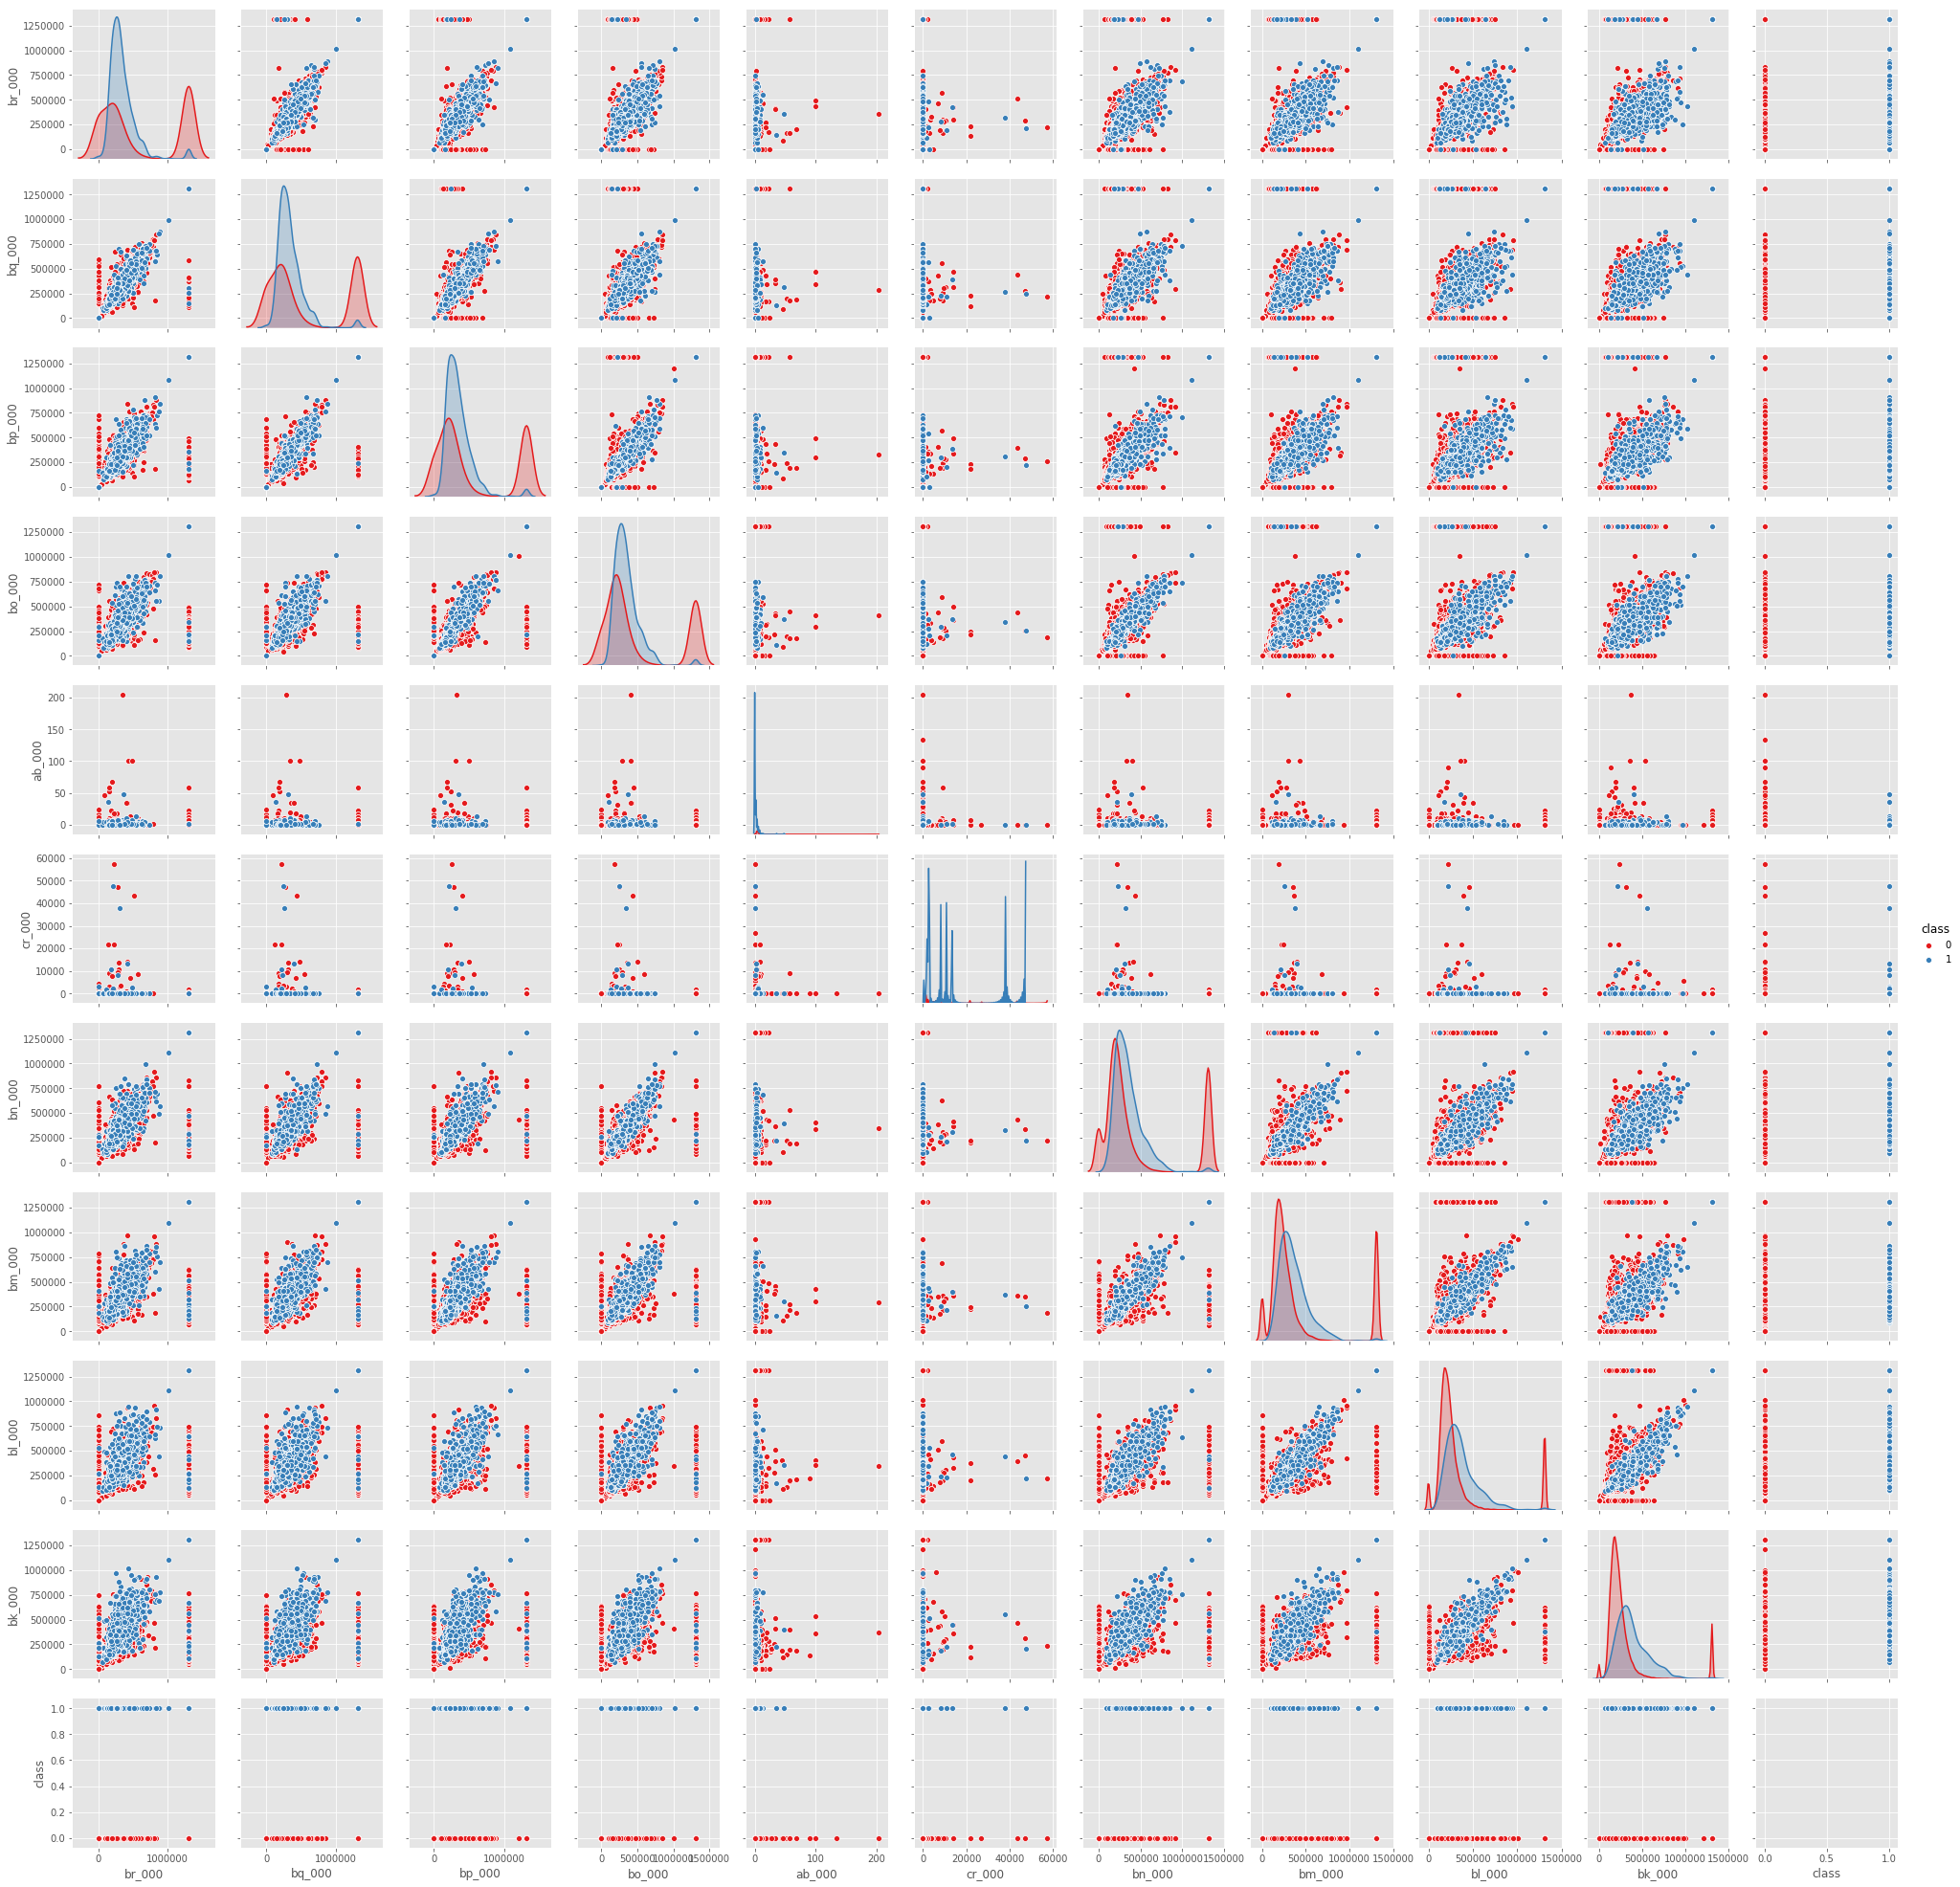

In [33]:
sns.pairplot(data=data[['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'bm_000', 'bl_000', 'bk_000', 'class']],
             hue='class',
             palette='Set1')
plt.show() 

In [34]:
data_corr_free.groupby('class')['bq_000', 'ab_000', 'cr_000', 'bk_000'].count()

,bq_000,ab_000,cr_000,bk_000
class,,,,
0,10365,13442,13442,36030
1,913,229,229,936


In [35]:
data_corr_free = data_corr_free.drop(['bq_000', 'ab_000', 'cr_000', 'bk_000'], axis = 1)

In [36]:
#Функция, которая саменит пропуски в данных по заданной стратегии
def fill_NA(data, strategy='mean', NA_cols=[]):
    data_copy = data.copy(deep=True)
    for c in NA_cols:
        if data_copy[c].isnull().sum()>0:
            if strategy=='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy=='median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy=='mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy

**Попробуем все три варианта**

In [37]:
data_fillna_median = fill_NA(data_corr_free, strategy='median', NA_cols=data_corr_free.columns[1:])
data_fillna_mean = fill_NA(data_corr_free, strategy='mean', NA_cols=data_corr_free.columns[1:])
data_fillna_mode = fill_NA(data_corr_free, strategy='mode', NA_cols=data_corr_free.columns[1:])

In [38]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_mode)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

df_quality.loc["corr & NaN with mode", :] = quality_report(pred, y_test.values)
df_quality

Train_shape: (42000, 108) Test shape: (18000, 108)

=== Quality Report ===
Accuracy: 	 0.990
Precision: 	 0.610
Recall: 	 0.726
f1_score: 	 0.663
ROC-AUC: 	 0.860



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.996800,0.54386,0.688889,0.607843,0.843401
corr & NaN with mode,0.989667,0.61000,0.726190,0.663043,0.859799


In [39]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_mean)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

df_quality.loc["corr & NaN with mean", :] = quality_report(pred, y_test.values)
df_quality

Train_shape: (42000, 108) Test shape: (18000, 108)

=== Quality Report ===
Accuracy: 	 0.989
Precision: 	 0.593
Recall: 	 0.721
f1_score: 	 0.651
ROC-AUC: 	 0.857



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.996800,0.543860,0.688889,0.607843,0.843401
corr & NaN with mode,0.989667,0.610000,0.726190,0.663043,0.859799
corr & NaN with mean,0.989389,0.593333,0.720648,0.650823,0.856888


In [40]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_median)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

df_quality.loc["corr & NaN with median", :] = quality_report (pred, y_test.values)
df_quality.round(3)

Train_shape: (42000, 108) Test shape: (18000, 108)

=== Quality Report ===
Accuracy: 	 0.990
Precision: 	 0.597
Recall: 	 0.728
f1_score: 	 0.656
ROC-AUC: 	 0.860



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860


**Вывод по замене пропусков:**

Лучшим вариантом на мой взгляд является замена модой. Однако результат после замены пропусков меняет точность определения классов. Несмотря на то, что немного упали значения метрик Precision, F1, Accuracy, мы теперь можем работать со случаями, когда какие-либо из данных, поступивших на вход модели, отсутствуют.

### Нормализация данных

In [41]:
def assess_data(data, df_quality, exp_name, verbose=False):
    X_train, X_test, y_train, y_test = data_split_train_test(data)
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [42]:
df_quality = assess_data(data_fillna_mode, df_quality, exp_name="NaN with Mode & Scaled", verbose=False)

df_quality

Train_shape: (42000, 108) Test shape: (18000, 108)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860
NaN with Mode & Scaled,0.990,0.610,0.726,0.663,0.860


### Регуляризация

В общем виде у нас существует два основных способа регуляризации модели: 
    - L1 (Лассо-регрессия) - регуляризация, которая состоит в добавлении в уравнение регрессии суммы модулей весов модели.L1 регуляризация приведет к занулению весов некоторых признаков.
    - L2 (Ридж-регрессия) - добавление в модель суммы квадратов весов модели. При это значения весов модели могут стать ничтожн малыми, но не занулятся. 

In [43]:
def get_balanced_sample(data, n=1000):
    data_0 = data[data["class"]==0].sample(n=n)
    data_1 = data[data["class"]==1].sample(n=n)
    return pd.concat([data_0, data_1])

data_sample_balanced = get_balanced_sample(data_fillna_mode)

In [44]:
X_train, X_test, y_train, y_test = data_split_train_test(data_sample_balanced, test_size=0.1)

Train_shape: (1800, 108) Test shape: (200, 108)


In [45]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [46]:
def get_reg_coefs(X_train, y_train, feature_columns, penalty="l1"):
    possible_Cs = np.arange(0.001,0.1,0.001)
    coefs_values = []

    for c in possible_Cs:
        model_LogR = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
        model_LogR.fit(X_train_scaled, y_train)
        coefs_values.append(model_LogR.coef_[0])
    
    return pd.DataFrame(coefs_values, columns=feature_columns).sort_index(ascending=False).reset_index(drop=True)

def plot_reg_coefs(coefs_df):
    plt.figure(figsize=(12,6))
    for c in coefs_df.columns:
        plt.plot(coefs_df[c])
    plt.show()

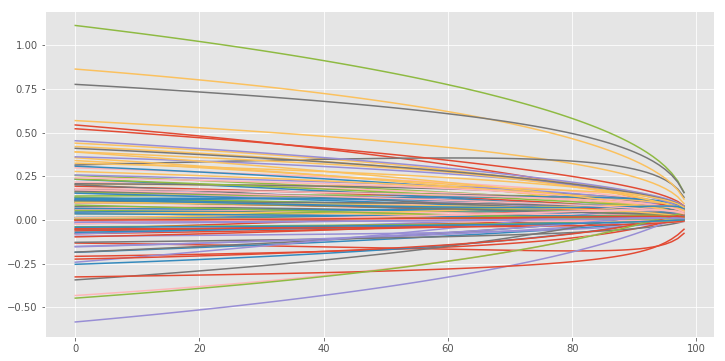

In [47]:
coefs_df_l2 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l2")
plot_reg_coefs(coefs_df_l2)

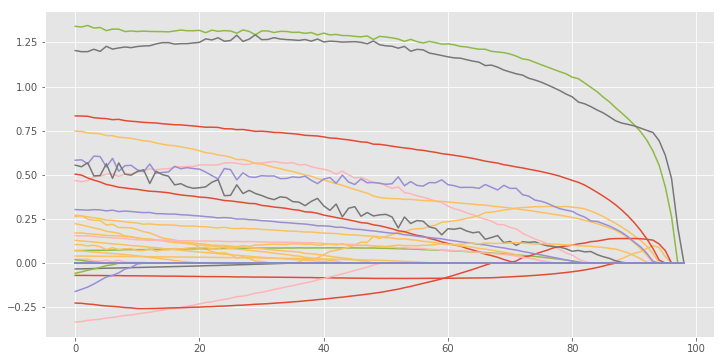

In [48]:
coefs_df_l1 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l1")

plot_reg_coefs(coefs_df_l1)

Посмотрим на признаки, которые нам удалось определить как значимые для данной модели на основе регуляризаций.

In [49]:
def get_important_features(coefs_df_l1, n_feats_limit):
    n_imp_feats = (coefs_df_l1!=0).sum(axis=1)
    index_imp_feats = n_imp_feats[n_imp_feats<=n_feats_limit].index[0]
    row_coef = coefs_df_l1.loc[index_imp_feats, :]
    return row_coef[row_coef!=0].index.tolist()

In [50]:
reg_important_20_features = get_important_features(coefs_df_l1, n_feats_limit=20)

reg_important_30_features = get_important_features(coefs_df_l1, n_feats_limit=30)

reg_important_40_features = get_important_features(coefs_df_l1, n_feats_limit=40)

reg_important_20_features, reg_important_30_features, reg_important_40_features

(['ac_000',
  'ag_003',
  'ar_000',
  'az_001',
  'ba_008',
  'bs_000',
  'cb_000',
  'cj_000',
  'ck_000',
  'cn_008',
  'cs_007',
  'db_000',
  'de_000',
  'dg_000',
  'dn_000',
  'dt_000',
  'dz_000',
  'ee_004',
  'ee_005',
  'ee_006'],
 ['ac_000',
  'ag_003',
  'al_000',
  'ar_000',
  'ay_000',
  'ay_003',
  'az_001',
  'ba_008',
  'bs_000',
  'cb_000',
  'cg_000',
  'ch_000',
  'cj_000',
  'ck_000',
  'cn_006',
  'cn_008',
  'cs_006',
  'cs_007',
  'db_000',
  'de_000',
  'dg_000',
  'dm_000',
  'dn_000',
  'dt_000',
  'dz_000',
  'ee_004',
  'ee_005',
  'ee_006',
  'ee_007'],
 ['ac_000',
  'ag_003',
  'al_000',
  'ar_000',
  'ay_000',
  'ay_003',
  'az_001',
  'ba_008',
  'bs_000',
  'cb_000',
  'cg_000',
  'ch_000',
  'cj_000',
  'ck_000',
  'cn_006',
  'cn_008',
  'cs_006',
  'cs_007',
  'db_000',
  'de_000',
  'dg_000',
  'dm_000',
  'dn_000',
  'dt_000',
  'dz_000',
  'ee_004',
  'ee_005',
  'ee_006',
  'ee_007'])

**Давайте опять проверим результаты!**

In [51]:
df_quality = assess_data(data_fillna_mode[["class"]+reg_important_20_features],
                         df_quality, exp_name="regularization_20", verbose=False)

df_quality

Train_shape: (42000, 20) Test shape: (18000, 20)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860
NaN with Mode & Scaled,0.990,0.610,0.726,0.663,0.860
regularization_20,0.987,0.457,0.659,0.539,0.825


In [52]:
df_quality = assess_data(data_fillna_mode[["class"]+reg_important_30_features],
                         df_quality, exp_name="regularization_30", verbose=False)

df_quality

Train_shape: (42000, 29) Test shape: (18000, 29)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860
NaN with Mode & Scaled,0.990,0.610,0.726,0.663,0.860
regularization_20,0.987,0.457,0.659,0.539,0.825
regularization_30,0.989,0.547,0.701,0.614,0.847


In [53]:
df_quality = assess_data(data_fillna_mode[["class"]+reg_important_40_features],
                         df_quality, exp_name="regularization_40", verbose=False)

df_quality

Train_shape: (42000, 29) Test shape: (18000, 29)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860
NaN with Mode & Scaled,0.990,0.610,0.726,0.663,0.860
regularization_20,0.987,0.457,0.659,0.539,0.825
regularization_30,0.989,0.547,0.701,0.614,0.847
regularization_40,0.989,0.547,0.701,0.614,0.847


**Качество модель стало немного хуже. Попробуем поработать с выбросами.**

In [54]:
data_reg_30 = data_fillna_mode[["class"]+reg_important_30_features].copy()

#data_reg_20 = data_fillna_mode[["class"]+reg_important_50_features].copy()

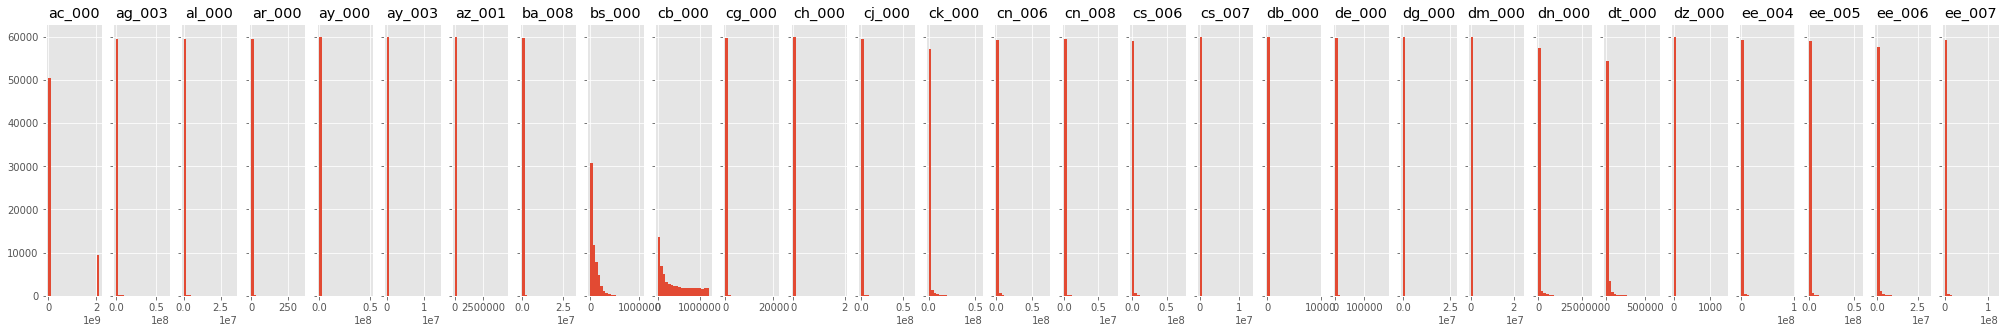

In [55]:
fig, ax = plt.subplots(1, len(reg_important_30_features),
                       sharey=True, figsize=(35, 5))
for i in range(len(reg_important_30_features)):
    f = reg_important_30_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_30[f], bins=20)
plt.show()

In [56]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.05) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.95) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy

In [57]:
data_reg_30_STD_outliers = windsorization(
    data_reg_30, cols=reg_important_30_features, borders_type="std", strategy='both')

data_reg_30_IQR_outliers = windsorization(
    data_reg_30, cols=reg_important_30_features, borders_type="iqr", strategy='both')

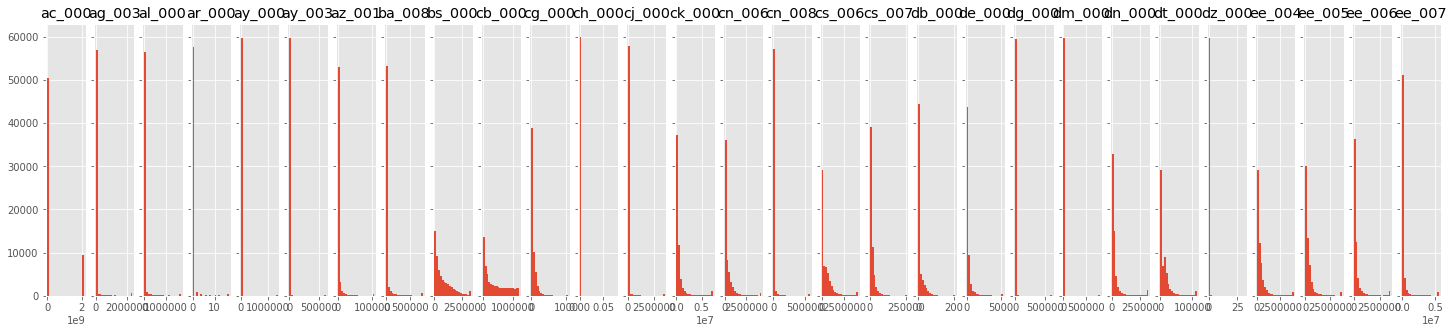

In [58]:
fig, ax = plt.subplots(1, len(reg_important_30_features),
                       sharey=True, figsize=(25, 5))
for i in range(len(reg_important_30_features)):
    f = reg_important_30_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_30_STD_outliers[f], bins=20)
plt.show()

In [59]:
df_quality = assess_data(data_reg_30_STD_outliers,
                         df_quality, exp_name="reg_30_outliers_std", verbose=False)

df_quality = assess_data(data_reg_30_IQR_outliers,
                         df_quality, exp_name="reg_30_outliers_iqr", verbose=False)

df_quality

Train_shape: (42000, 29) Test shape: (18000, 29)
Train_shape: (42000, 29) Test shape: (18000, 29)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860
NaN with Mode & Scaled,0.990,0.610,0.726,0.663,0.860
regularization_20,0.987,0.457,0.659,0.539,0.825
regularization_30,0.989,0.547,0.701,0.614,0.847
regularization_40,0.989,0.547,0.701,0.614,0.847
reg_30_outliers_std,0.988,0.550,0.682,0.609,0.837
reg_30_outliers_iqr,0.986,0.500,0.615,0.551,0.803


Исходя из результатов, в качестве нашей модели лучше всего будет использовать модель "NaN with Mode & Scaled", где мы заменяем пропуски модой, нормализуем данные и не удаляем выбросы. Кроме того, перед этой обработкой мы также почистили скореллированные признаки и удалили переменные с большим количеством пропусков. 

Попробуем на тех же данных обучить модель KNN. 

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1,7)}

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, param_grid)
knn_model.fit(X_train_scaled, y_train)
pred = knn_model.predict(X_test_scaled)  
print('_'*50)
print("Best model " + str(knn_model.best_params_))
print("Train quality:")
quality_report(knn_model.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn_model.predict(X_test_scaled), y_test)
print('_'*50)

D:\programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


__________________________________________________
Best model {'n_neighbors': 3}
Train quality:

=== Quality Report ===
Accuracy: 	 0.967
Precision: 	 0.952
Recall: 	 0.981
f1_score: 	 0.966
ROC-AUC: 	 0.967


Test quality:

=== Quality Report ===
Accuracy: 	 0.935
Precision: 	 0.900
Recall: 	 0.968
f1_score: 	 0.933
ROC-AUC: 	 0.937

__________________________________________________


In [62]:
quality_list = quality_report(pred, y_test.values)
df_quality.loc['KNN + best_params', :] = quality_list
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.935
Precision: 	 0.900
Recall: 	 0.968
f1_score: 	 0.933
ROC-AUC: 	 0.937



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.997,0.544,0.689,0.608,0.843
corr & NaN with mode,0.990,0.610,0.726,0.663,0.860
corr & NaN with mean,0.989,0.593,0.721,0.651,0.857
corr & NaN with median,0.990,0.597,0.728,0.656,0.860
NaN with Mode & Scaled,0.990,0.610,0.726,0.663,0.860
regularization_20,0.987,0.457,0.659,0.539,0.825
regularization_30,0.989,0.547,0.701,0.614,0.847
regularization_40,0.989,0.547,0.701,0.614,0.847
reg_30_outliers_std,0.988,0.550,0.682,0.609,0.837
reg_30_outliers_iqr,0.986,0.500,0.615,0.551,0.803


Лучший результат на данном датасете показала следующая последовательность действий: 
        - удаление коррелирующих признаков;
        - удаление признаков с большим количеством пропусков;
        - замена пропусков модой;
        - нормализация;
        - KNN с (n_neighbours = 3)